In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#step 1 load the data set
data = pd.read_csv("parkinsons.csv", delimiter=',')

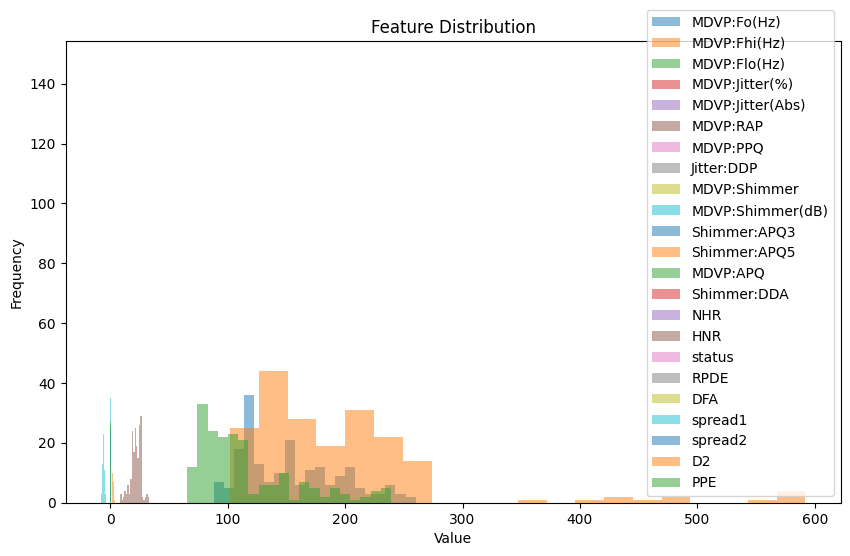

In [12]:
#step 3 plotting
plt.figure(figsize=(10, 6))
for col in data.columns[1:]:
    plt.hist(data[col], bins=20, alpha=0.5, label=col)
plt.legend()
plt.title("Feature Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [13]:

#step 2 preprocessing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
selected_features=['spread1', 'PPE', 'spread2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:DDA', 'D2', 'MDVP:Jitter(Abs)', 'RPDE']


X = data[selected_features]
y = data['status']

#step 5 spliting the data set
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
#testing the data set
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

In [15]:
y_pred = lr_model.predict(X_test)
#performance of the trained model.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.8974358974358975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Confusion Matrix:
[[ 3  4]
 [ 0 32]]


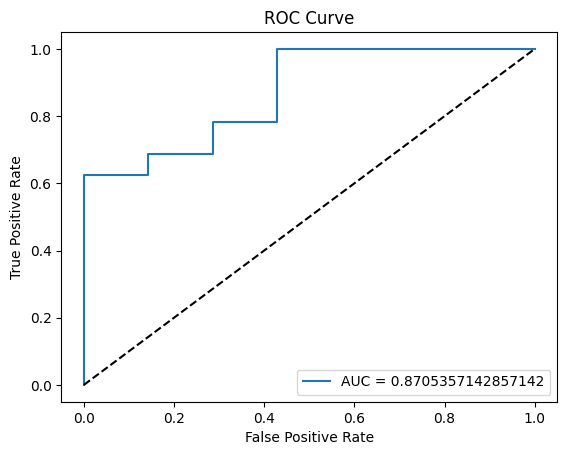

In [14]:
#Represent the training and testing results using ROC curves.
y_pred_proba = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Measure the performance of the model
#In your case, you calculated the accuracy of the logistic regression model on the testing set, which gives an overall idea of the model's performance. However, accuracy alone may not be sufficient to evaluate the model's performance, especially in imbalanced datasets.
#    Accuracy: The logistic regression model achieved 0.89% accuracy on the testing set.
#    Classification Report: Precision, Recall, and F1-score are metrics used to evaluate the model's performance for each class.
#    Confusion Matrix: It shows the counts of true positive, true negative, false positive, and false negative predictions.
#    ROC Curve and AUC Score: The ROC curve visualizes the model's performance, and the AUC score quantifies it. A higher AUC score indicates better performance.